In [3]:
# playground.ipynb

!pip install opencv-python
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

In [4]:
#Access Data


DEEPFAKES_CSV_PATH = 'Data/csv/Deepfakes.csv'
ORIGINAL_CSV_PATH = 'Data/csv/original.csv'
VIDEOS_BASE_PATH = 'Data'  # Folder containing Deepfakes/ and original/ folders

# Load the datasets
def load_data():
    deepfakes_df = pd.read_csv(DEEPFAKES_CSV_PATH)
    original_df = pd.read_csv(ORIGINAL_CSV_PATH)
    
    # Add source column for identification
    deepfakes_df['source'] = 'deepfake'
    original_df['source'] = 'original'
    
    return deepfakes_df, original_df

deepfakes_df, original_df = load_data()

In [5]:
def explore_data(deepfakes_df, original_df):
    print("=== DEEPFAKES DATASET ===")
    print(f"Shape: {deepfakes_df.shape}")
    print(f"Columns: {deepfakes_df.columns.tolist()}")
    print("\nBasic Info:")
    print(deepfakes_df.info())
    
    print("\n=== ORIGINAL DATASET ===")
    print(f"Shape: {original_df.shape}")
    print(f"Columns: {original_df.columns.tolist()}")
    print("\nBasic Info:")
    print(original_df.info())
    
    return deepfakes_df, original_df

deepfakes_df, original_df = explore_data(deepfakes_df, original_df)

=== DEEPFAKES DATASET ===
Shape: (1000, 9)
Columns: ['Unnamed: 0', 'File Path', 'Label', 'Frame Count', 'Width', 'Height', 'Codec', 'File Size(MB)', 'source']

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1000 non-null   int64  
 1   File Path      1000 non-null   object 
 2   Label          1000 non-null   object 
 3   Frame Count    1000 non-null   int64  
 4   Width          1000 non-null   int64  
 5   Height         1000 non-null   int64  
 6   Codec          1000 non-null   object 
 7   File Size(MB)  1000 non-null   float64
 8   source         1000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB
None

=== ORIGINAL DATASET ===
Shape: (1000, 9)
Columns: ['Unnamed: 0', 'File Path', 'Label', 'Frame Count', 'Width', 'Height', 'Codec', 'File Size(MB)', 'source']

Basic Info:

In [6]:
def clean_and_merge_data(deepfakes_df, original_df):
    # Check for missing values
    print("Missing values in Deepfakes:")
    print(deepfakes_df.isnull().sum())
    print("\nMissing values in Original:")
    print(original_df.isnull().sum())
    
    # Check data types
    print("\nData types:")
    print("Deepfakes:", deepfakes_df.dtypes)
    print("Original:", original_df.dtypes)
    
    # Combine datasets
    combined_df = pd.concat([deepfakes_df, original_df], ignore_index=True)
    
    # Verify the combination
    print(f"\nCombined dataset shape: {combined_df.shape}")
    print(f"Class distribution:\n{combined_df['Label'].value_counts()}")
    
    return combined_df

combined_df = clean_and_merge_data(deepfakes_df, original_df)

Missing values in Deepfakes:
Unnamed: 0       0
File Path        0
Label            0
Frame Count      0
Width            0
Height           0
Codec            0
File Size(MB)    0
source           0
dtype: int64

Missing values in Original:
Unnamed: 0       0
File Path        0
Label            0
Frame Count      0
Width            0
Height           0
Codec            0
File Size(MB)    0
source           0
dtype: int64

Data types:
Deepfakes: Unnamed: 0         int64
File Path         object
Label             object
Frame Count        int64
Width              int64
Height             int64
Codec             object
File Size(MB)    float64
source            object
dtype: object
Original: Unnamed: 0         int64
File Path         object
Label             object
Frame Count        int64
Width              int64
Height             int64
Codec             object
File Size(MB)    float64
source            object
dtype: object

Combined dataset shape: (2000, 9)
Class distribution:
Label
F

First 5 rows of combined dataset:


,Unnamed: 0,File Path,Label,Frame Count,Width,Height,Codec,File Size(MB),source
0,0,Deepfakes/000_003.mp4,FAKE,396,640,480,h264,0.85,deepfake
1,1,Deepfakes/001_870.mp4,FAKE,460,1280,720,h264,2.74,deepfake
2,2,Deepfakes/002_006.mp4,FAKE,693,1280,720,h264,1.98,deepfake
3,3,Deepfakes/003_000.mp4,FAKE,303,640,480,h264,0.57,deepfake
4,4,Deepfakes/004_982.mp4,FAKE,309,1280,720,h264,1.19,deepfake



Basic Statistics:
       Frame Count        Width       Height  File Size(MB)
count  2000.000000  2000.000000  2000.000000    2000.000000
mean    509.128000  1036.348000   636.718000       1.873595
std     205.528919   432.735888   200.717354       1.538400
min     287.000000   272.000000   480.000000       0.320000
25%     356.000000   640.000000   480.000000       0.860000
50%     457.500000   854.000000   480.000000       1.370000
75%     588.500000  1280.000000   720.000000       2.380000
max    1814.000000  1920.000000  1080.000000      13.450000


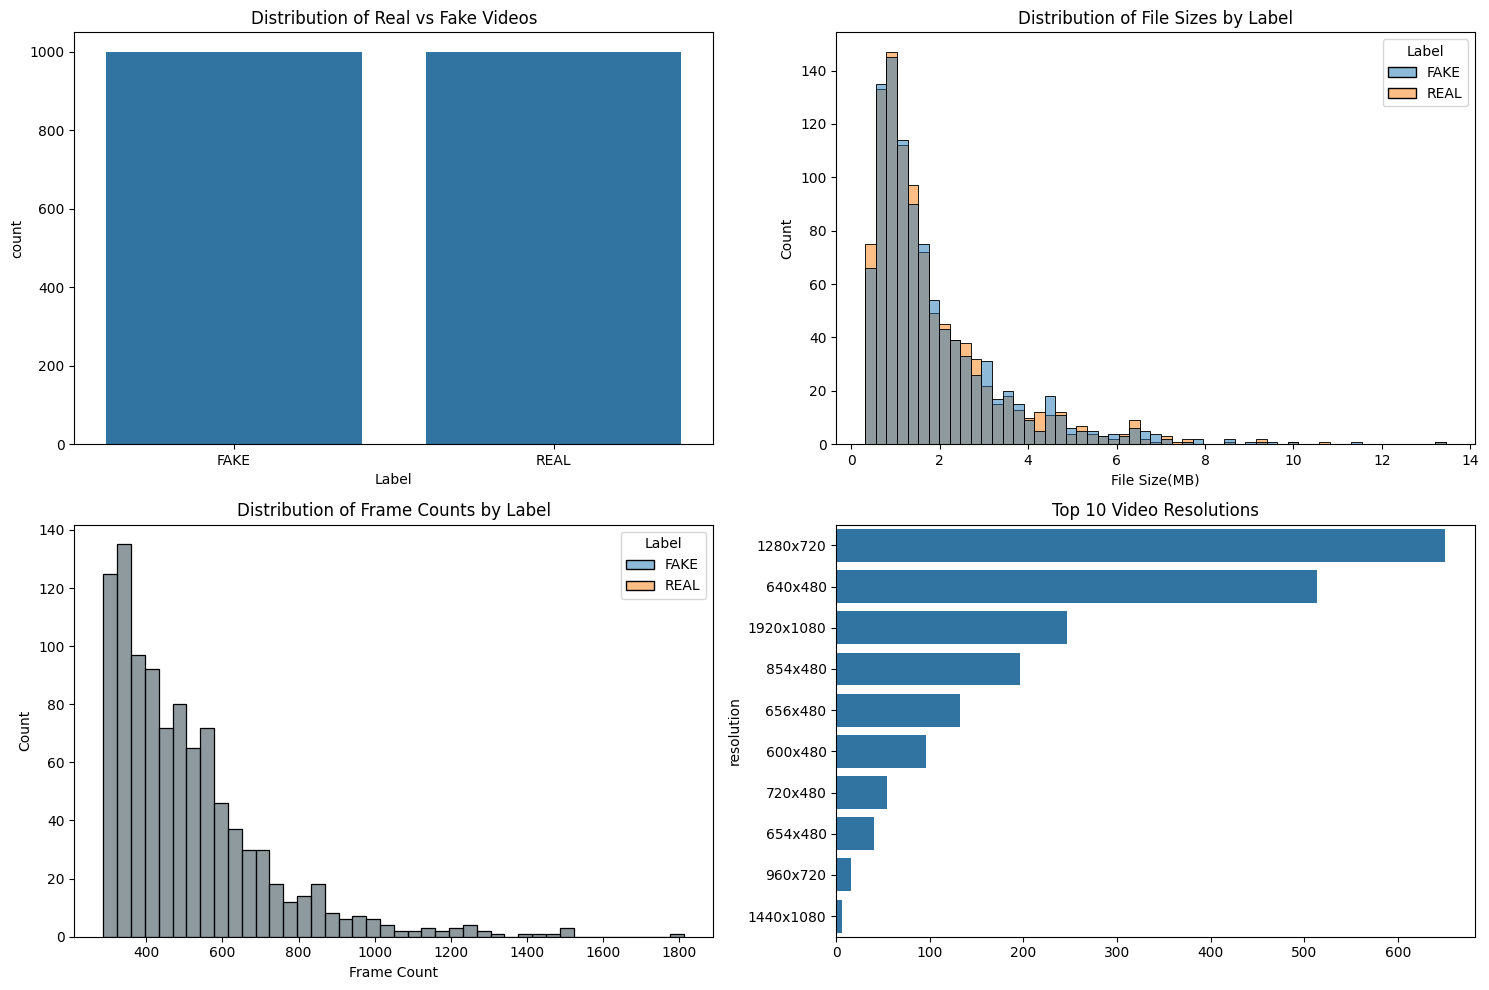

In [7]:
def analyze_data(combined_df):
    # Display first few rows
    print("First 5 rows of combined dataset:")
    display(combined_df.head())
    
    # Basic statistics
    print("\nBasic Statistics:")
    numeric_columns = ['Frame Count', 'Width', 'Height', 'File Size(MB)']
    print(combined_df[numeric_columns].describe())
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Distribution of labels
    sns.countplot(data=combined_df, x='Label', ax=axes[0,0])
    axes[0,0].set_title('Distribution of Real vs Fake Videos')
    
    # Distribution of file sizes
    sns.histplot(data=combined_df, x='File Size(MB)', hue='Label', ax=axes[0,1])
    axes[0,1].set_title('Distribution of File Sizes by Label')
    
    # Distribution of frame counts
    sns.histplot(data=combined_df, x='Frame Count', hue='Label', ax=axes[1,0])
    axes[1,0].set_title('Distribution of Frame Counts by Label')
    
    # Resolution analysis
    combined_df['resolution'] = combined_df['Width'].astype(str) + 'x' + combined_df['Height'].astype(str)
    resolution_counts = combined_df['resolution'].value_counts().head(10)
    sns.barplot(x=resolution_counts.values, y=resolution_counts.index, ax=axes[1,1])
    axes[1,1].set_title('Top 10 Video Resolutions')
    
    plt.tight_layout()
    plt.show()
    
    return combined_df

combined_df = analyze_data(combined_df)

In [ ]:
def validate_video_files(combined_df, sample_size=5):
    """
    Validate that video files exist and can be accessed
    """
    print("Validating video file access...")
    
    valid_files = []
    problematic_files = []
    
    # Test a sample of files
    test_sample = combined_df.sample(min(sample_size, len(combined_df)))
    
    for idx, row in test_sample.iterrows():
        file_path = os.path.join(VIDEOS_BASE_PATH, row['File Path'])
        try:
            if os.path.exists(file_path):
                # Try to read video metadata
                cap = cv2.VideoCapture(file_path)
                if cap.isOpened():
                    valid_files.append(row['File Path'])
                    cap.release()
                else:
                    problematic_files.append(row['File Path'])
            else:
                problematic_files.append(row['File Path'])
        except Exception as e:
            problematic_files.append(row['File Path'])
            print(f"Error with {file_path}: {e}")
    
    print(f"Valid files: {len(valid_files)}")
    print(f"Problematic files: {len(problematic_files)}")
    
    if problematic_files:
        print("Sample problematic files:", problematic_files[:3])
    
    return valid_files, problematic_files

valid_files, problematic_files = validate_video_files(combined_df)

In [8]:
def generate_data_quality_report(combined_df):
    """
    Generate a comprehensive data quality report
    """
    print("="*50)
    print("DATA QUALITY REPORT")
    print("="*50)
    
    # Basic metrics
    total_samples = len(combined_df)
    real_samples = len(combined_df[combined_df['Label'] == 'REAL'])
    fake_samples = len(combined_df[combined_df['Label'] == 'FAKE'])
    
    print(f"Total samples: {total_samples}")
    print(f"Real videos: {real_samples} ({real_samples/total_samples*100:.2f}%)")
    print(f"Fake videos: {fake_samples} ({fake_samples/total_samples*100:.2f}%)")
    
    # Resolution diversity
    unique_resolutions = combined_df['resolution'].nunique()
    print(f"Unique resolutions: {unique_resolutions}")
    
    # Codec information
    codec_distribution = combined_df['Codec'].value_counts()
    print(f"Video codecs: {codec_distribution.to_dict()}")
    
    # File size analysis
    avg_file_size = combined_df['File Size(MB)'].mean()
    max_file_size = combined_df['File Size(MB)'].max()
    min_file_size = combined_df['File Size(MB)'].min()
    
    print(f"File size - Avg: {avg_file_size:.2f}MB, Max: {max_file_size:.2f}MB, Min: {min_file_size:.2f}MB")
    
    # Frame count analysis
    avg_frames = combined_df['Frame Count'].mean()
    max_frames = combined_df['Frame Count'].max()
    min_frames = combined_df['Frame Count'].min()
    
    print(f"Frames - Avg: {avg_frames:.1f}, Max: {max_frames}, Min: {min_frames}")
    
    return {
        'total_samples': total_samples,
        'real_samples': real_samples,
        'fake_samples': fake_samples,
        'unique_resolutions': unique_resolutions,
        'avg_file_size': avg_file_size,
        'avg_frames': avg_frames
    }

quality_metrics = generate_data_quality_report(combined_df)

DATA QUALITY REPORT
Total samples: 2000
Real videos: 1000 (50.00%)
Fake videos: 1000 (50.00%)
Unique resolutions: 29
Video codecs: {'h264': 2000}
File size - Avg: 1.87MB, Max: 13.45MB, Min: 0.32MB
Frames - Avg: 509.1, Max: 1814, Min: 287


In [9]:
def save_processed_data(combined_df, output_path='/content/drive/MyDrive/processed_dataset.csv'):
    """
    Save the cleaned and processed dataset
    """
    # Create additional useful features
    combined_df['duration_estimate'] = combined_df['Frame Count'] / 30  # Assuming 30fps
    combined_df['size_per_frame'] = combined_df['File Size(MB)'] / combined_df['Frame Count']
    combined_df['pixel_count'] = combined_df['Width'] * combined_df['Height']
    
    # Save to CSV
    combined_df.to_csv(output_path, index=False)
    print(f"Processed dataset saved to: {output_path}")
    
    return combined_df

# Save the processed data
processed_df = save_processed_data(combined_df)

OSError: Cannot save file into a non-existent directory: '\content\drive\MyDrive'

In [ ]:
# FINAL NOTEBOOK STRUCTURE
print("""
DEEPFAKE DETECTION PROJECT - DATA PIPELINE
=========================================

1.  Development Environment: Google Colab with required packages
2.  Data Collection: CSV files loaded from Google Drive
3.  Data Cleaning: Missing values checked, data types verified
4.  Data Exploration: Statistical analysis and visualizations
5.  Data Validation: Video file accessibility checked
6.  Data Quality Report: Comprehensive metrics generated
7.  Processed Data: Enhanced features and saved output

NEXT STEPS:
- Feature engineering for model training
- Frame extraction from videos
- Model architecture design
- Training and validation pipelines
""")